In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Volumes/GoogleDrive/.shortcut-targets-by-id/1rUx7_7LmBqAQTbWEWVTGvw0_d0v6N2ZT/신입기수 프로젝트/Dataset')

In [ ]:
df = pd.read_csv('rawdata.csv')

In [ ]:
df

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_arima = df[['날짜', '청담대교_유량', '청담대교_수위', '잠수교_유량', '잠수교_수위', '한강대교_유량', '한강대교_수위', '행주대교_유량', '행주대교_수위']]

In [ ]:
df_arima

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
0,2012-05-01 00:00,469.05,310.7,0.0,300.2,729.80,290.0,540.18,275.3
1,2012-05-01 00:10,498.00,314.7,0.0,300.2,731.48,290.0,540.18,275.3
2,2012-05-01 00:20,490.68,313.7,0.0,301.2,726.42,290.0,540.18,275.3
3,2012-05-01 00:30,476.21,311.7,0.0,301.2,726.42,290.0,552.17,276.3
4,2012-05-01 00:40,476.21,311.7,0.0,301.2,707.17,291.0,564.29,277.3
...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0
276332,2022-07-18 23:20,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0
276333,2022-07-18 23:30,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0
276334,2022-07-18 23:40,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0


In [ ]:
# 결측치 개수 확인
df_arima.isnull().sum()

날짜              0
청담대교_유량     16380
청담대교_수위        59
잠수교_유량     196849
잠수교_수위         59
한강대교_유량      1279
한강대교_수위        59
행주대교_유량        59
행주대교_수위        59
dtype: int64

In [ ]:
# 59개의 결측치 분포 살펴보기(청담대교_수위, 잠수교_수위, 한강대교_수위, 행주대교_유량, 행주대교_수위)
nanIndex1 = df_arima[df_arima['행주대교_유량'].isnull()].index

In [ ]:
# 한강대교_유량 : 결측치 1279개 
# 분포 살펴보기
nanIndex2 = df_arima[df_arima['한강대교_유량'].isnull()].index
nanIndex2

Int64Index([ 91352,  91353,  91354,  91355,  91356,  91357,  91358,  91359,
             91360,  91361,
            ...
            262125, 262126, 262127, 262128, 262129, 262130, 262131, 262132,
            262133, 262134],
           dtype='int64', length=1279)

In [ ]:
# 연속적인 결측치와 불연속적인 결측치 구분
unconsecutive = []
consecutive = []
i = 0
while i < len(nanIndex2):
    if nanIndex2[i]+1 in nanIndex2:
        consecutive.extend([nanIndex2[i], nanIndex2[i+1]])
        try:
            i += 2
        except: #i가 len(nanIndex2) - 1
            break
    elif nanIndex2[i]-1 in nanIndex2: #반복 구간의 마지막 인덱스일 경우
        consecutive.append(nanIndex2[i])
        i += 1
    else:
        unconsecutive.append(nanIndex2[i])
        i += 1

In [ ]:
unconsecutive

[236080]

In [ ]:
consecutive

[91352,
 91353,
 91354,
 91355,
 91356,
 91357,
 91358,
 91359,
 91360,
 91361,
 91362,
 91363,
 91364,
 91365,
 91366,
 91367,
 91368,
 91369,
 91370,
 91371,
 91372,
 91377,
 91378,
 91379,
 91380,
 91381,
 91382,
 91383,
 91384,
 91385,
 91386,
 91387,
 91388,
 91389,
 91390,
 91391,
 91392,
 91393,
 91394,
 91395,
 91396,
 91397,
 91398,
 91399,
 91400,
 91401,
 91402,
 91403,
 91404,
 91405,
 91406,
 91407,
 91408,
 91409,
 91410,
 91411,
 91412,
 91413,
 91414,
 91415,
 91416,
 91417,
 91418,
 91419,
 91420,
 91421,
 91422,
 91423,
 91424,
 91425,
 91426,
 91427,
 91428,
 91429,
 91430,
 91431,
 91432,
 91433,
 91434,
 91435,
 91436,
 91437,
 91438,
 91439,
 91440,
 91441,
 91442,
 91443,
 91444,
 91445,
 91446,
 91447,
 91448,
 91449,
 91450,
 91451,
 91452,
 91453,
 91454,
 91455,
 91456,
 91457,
 91458,
 91459,
 91460,
 91461,
 91462,
 91463,
 91464,
 91465,
 91466,
 91467,
 91468,
 91469,
 91470,
 91471,
 91472,
 91473,
 91474,
 91475,
 91476,
 91477,
 91478,
 91479,
 91480,


In [ ]:
# consecutive unconsecutive 합쳐서 1279인지 확인 
len(consecutive + unconsecutive)

1279

In [ ]:
# consecutive 내에서 구간별로 분리
dummy = []
consecutive2 = [] # 2차원 consecutive
for i in consecutive[:-1]: 
    dummy.append(i)
    if i+1 not in consecutive:
        if i == consecutive[-2]: #만약 마지막 반복일 경우, consecutive[-1]을 추가로 넣어주어야 함
            dummy.append(i+1)
            consecutive2.append(dummy)
        else: 
            consecutive2.append(dummy)
            dummy= []             

In [ ]:
# 2차원 consecutive의 모양 확인(길이, 첫index, 끝index)

for i in range(len(consecutive2)):
    print(len(consecutive2[i]), consecutive2[i][0], consecutive2[i][-1])

21 91352 91372
167 91377 91543
49 95108 95156
129 95988 96116
22 97716 97737
15 102598 102612
101 110259 110359
117 119757 119873
156 119898 120053
58 140613 140670
116 180951 181066
102 243029 243130
26 247281 247306


In [ ]:
# unconsecutive 보간처리 - 하나이므로 그냥 손수 보간에 필요한 인덱스 만듦
unconsecutive2 = [236079, 236080, 236081]

In [ ]:
# unconsecutive 보간처리 - 바로 df_arima에 합치기
df_arima.loc[unconsecutive2, ['한강대교_유량']] = df_arima.loc[unconsecutive2, ['한강대교_유량']].interpolate(axis = 0)
df_arima.loc[unconsecutive2, ['한강대교_유량']]
# loc을 사용했더니 Inplace를 True로 해주어도 값이 업데이트 되지 않았음

,한강대교_유량
236079,473.290
236080,489.265
236081,505.240


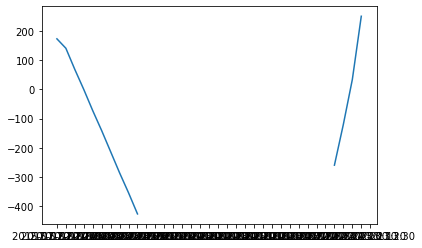

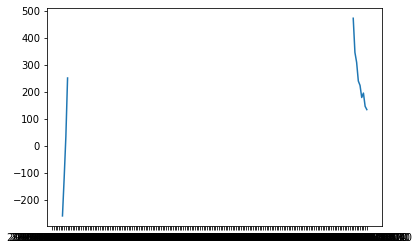

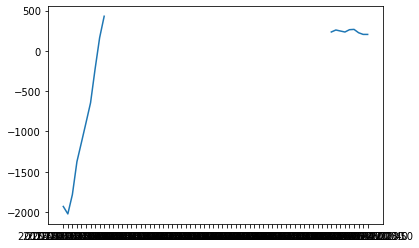

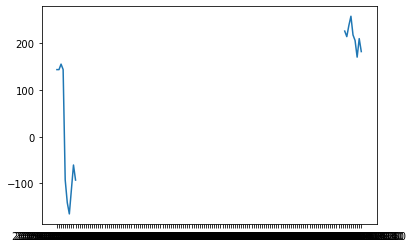

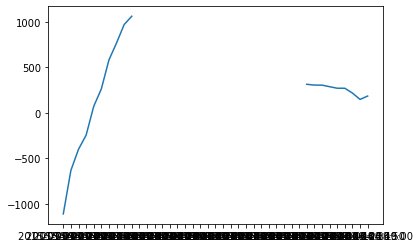

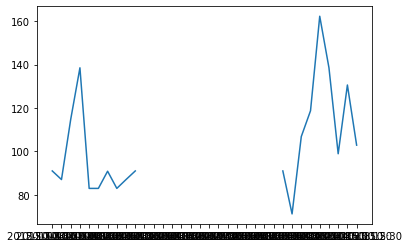

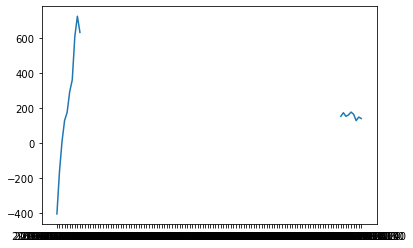

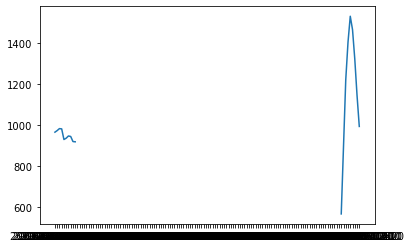

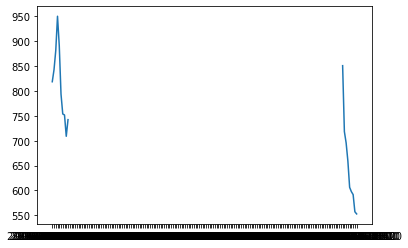

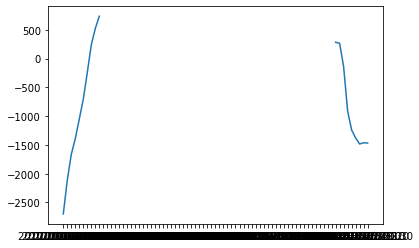

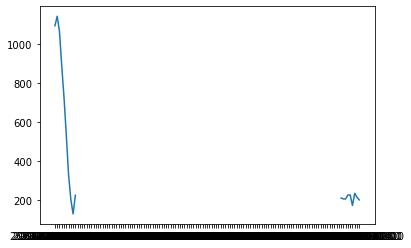

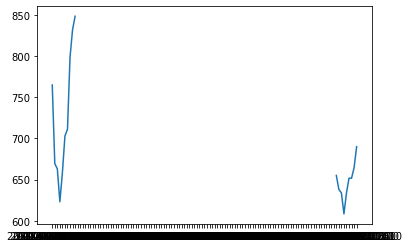

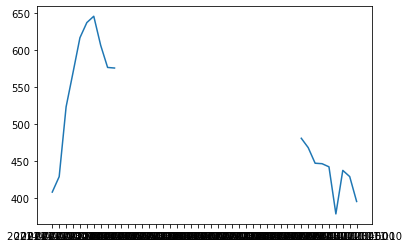

In [ ]:
# consecutive arima - 분포 그려보기

for i in range(len(consecutive2)):
    start = consecutive2[i][0]-10
    end = consecutive2[i][-1]+10
    x = df_arima['날짜'][start:end]
    y = df_arima['한강대교_유량'][start:end]
    plt.plot(x, y)
    plt.show()

In [ ]:
# !pip install pmdarima

     |████████████████████████████████| 604 kB 9.6 MB/s eta 0:00:01


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
df_hangang = df[['날짜', '한강대교_유량']]
df_hangang['날짜']=pd.to_datetime(df_hangang['날짜'])
df_hangang = df_hangang.set_index('날짜')
df_hangang

/var/folders/vd/3w12zbbd61d83k62bdk6hqbc0000gn/T/ipykernel_21035/989289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hangang['날짜']=pd.to_datetime(df_hangang['날짜'])


,한강대교_유량
날짜,
2012-05-01 00:00:00,729.80
2012-05-01 00:10:00,731.48
2012-05-01 00:20:00,726.42
2012-05-01 00:30:00,726.42
2012-05-01 00:40:00,707.17
...,...
2022-07-18 23:10:00,-456.41
2022-07-18 23:20:00,-717.30
2022-07-18 23:30:00,-843.37


In [ ]:
n = 1000
for tmp in consecutive2:
    start = tmp[0]
    model = pm.auto_arima(df_arima['한강대교_유량'][start-n:start], seasonal = True)
    df_arima.loc[tmp, ['한강대교_유량']] = model.predict(len(tmp))

/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal


/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal


/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/dayounglee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal


In [ ]:
# arima를 사용하고 나서도 Null값이 있음..

df_arima['한강대교_유량'].isnull().sum()

199

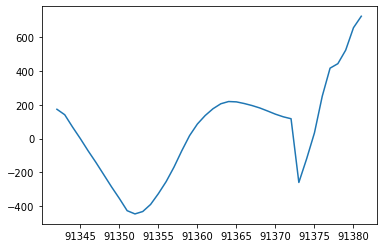

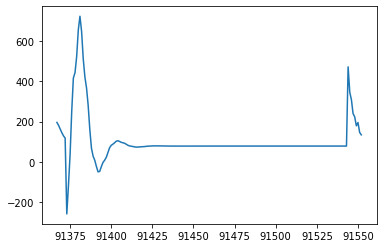

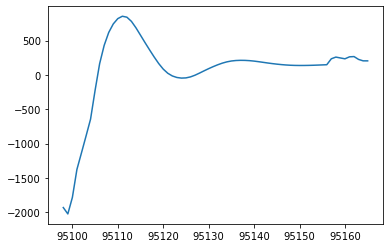

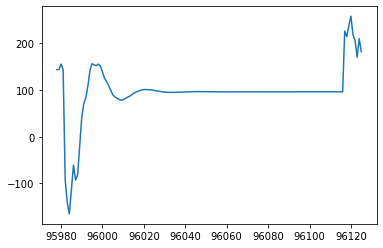

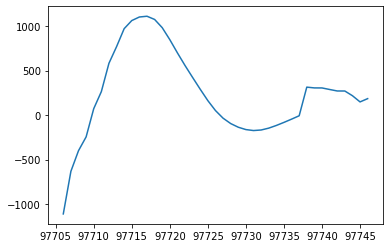

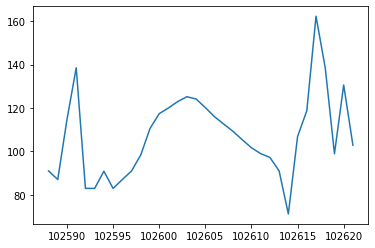

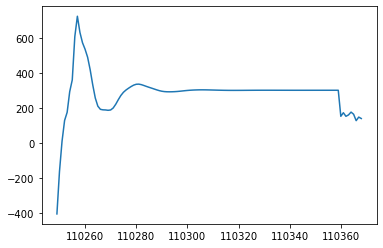

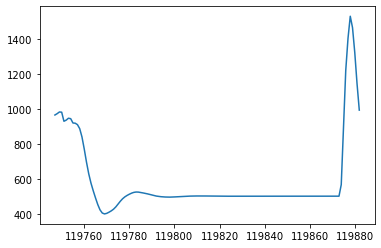

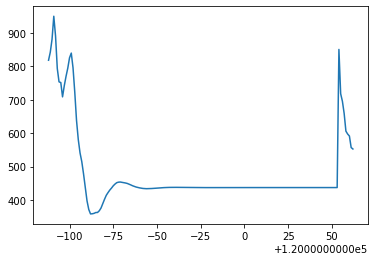

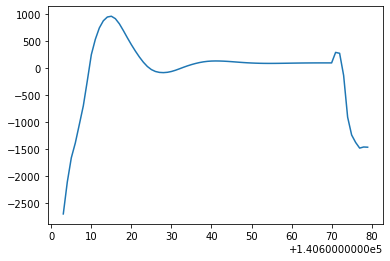

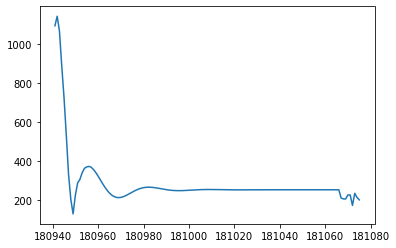

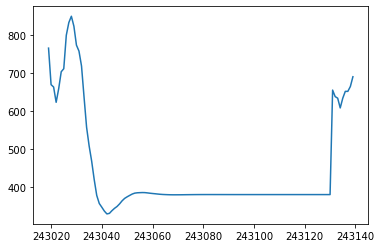

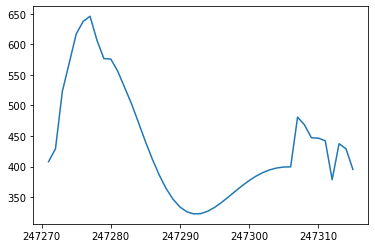

In [ ]:
# consecutive arima - 분포 그려보기(null값 확인)
# 결측치가 잘 처리된건가.. 난 몰라.. 좀 이상한 것 같음..

for i in range(len(consecutive2)):
    start = consecutive2[i][0]-10
    end = consecutive2[i][-1]+10
    x = df_arima[start:end].index
    y = df_arima['한강대교_유량'][start:end]
    plt.plot(x, y)
    plt.show()

In [ ]:
# 인덱스를 알려달라고 해도 이런 쓰잘대기없는 정보뿐...

df_arima['한강대교_유량'].isnull().index

RangeIndex(start=0, stop=276336, step=1)

In [ ]:
# 일단 csv로 만들어...

df_arima[['날짜', '한강대교_유량']].to_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1rUx7_7LmBqAQTbWEWVTGvw0_d0v6N2ZT/신입기수 프로젝트/Dataset/0819_한강대교_Arima.csv', index = False)

In [ ]:
df_arima['잠수교_수위'].interpolate()
df_arima['청담대교_수위'].interpolate()
df_arima['한강대교_수위'].interpolate()
df_arima['행주대교_수위'].interpolate()
df_arima['한강대교_유량'].interpolate()
df_arima['행주대교_유량'].interpolate()